## Plot tumor purity prediction results

Here, we'll visualize the results of our tumor purity prediction. We're predicting real-valued purity labels here (e.g. elastic net regression).

Results analyzed here are generated by the `run_purity_prediction.py` script, without the `--classify` argument.

In [1]:
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib; matplotlib.rcParams['figure.dpi'] = 300
import seaborn as sns

import mpmp.config as cfg
import mpmp.utilities.analysis_utilities as au

In [2]:
# set results directory
results_dir = Path(cfg.results_dir,
                   'purity_reg_results',
                   'purity').resolve()

In [3]:
results_df = (
    au.load_purity_results(results_dir)
      .drop(columns=['identifier'])
)
# all me_450k results are compressed
results_df[results_df.training_data == 'me_450k'] = 'me_450k_compressed'
print(results_df.shape)
print(results_df.training_data.unique())
results_df.head()

(240, 8)
['me_27k' 'expression_compressed' 'me_450k_compressed' 'me_27k_compressed'
 'expression']


,mse,rmse,r2,data_type,training_data,signal,seed,fold_no
0,0.012951,0.1138,0.71065,train,me_27k,signal,1,0
1,0.018804,0.13713,0.5799,cv,me_27k,signal,1,0
2,0.01421,0.11921,0.69419,test,me_27k,signal,1,0
3,0.012505,0.11183,0.7241,train,me_27k,signal,1,1
4,0.018062,0.1344,0.6015,cv,me_27k,signal,1,1


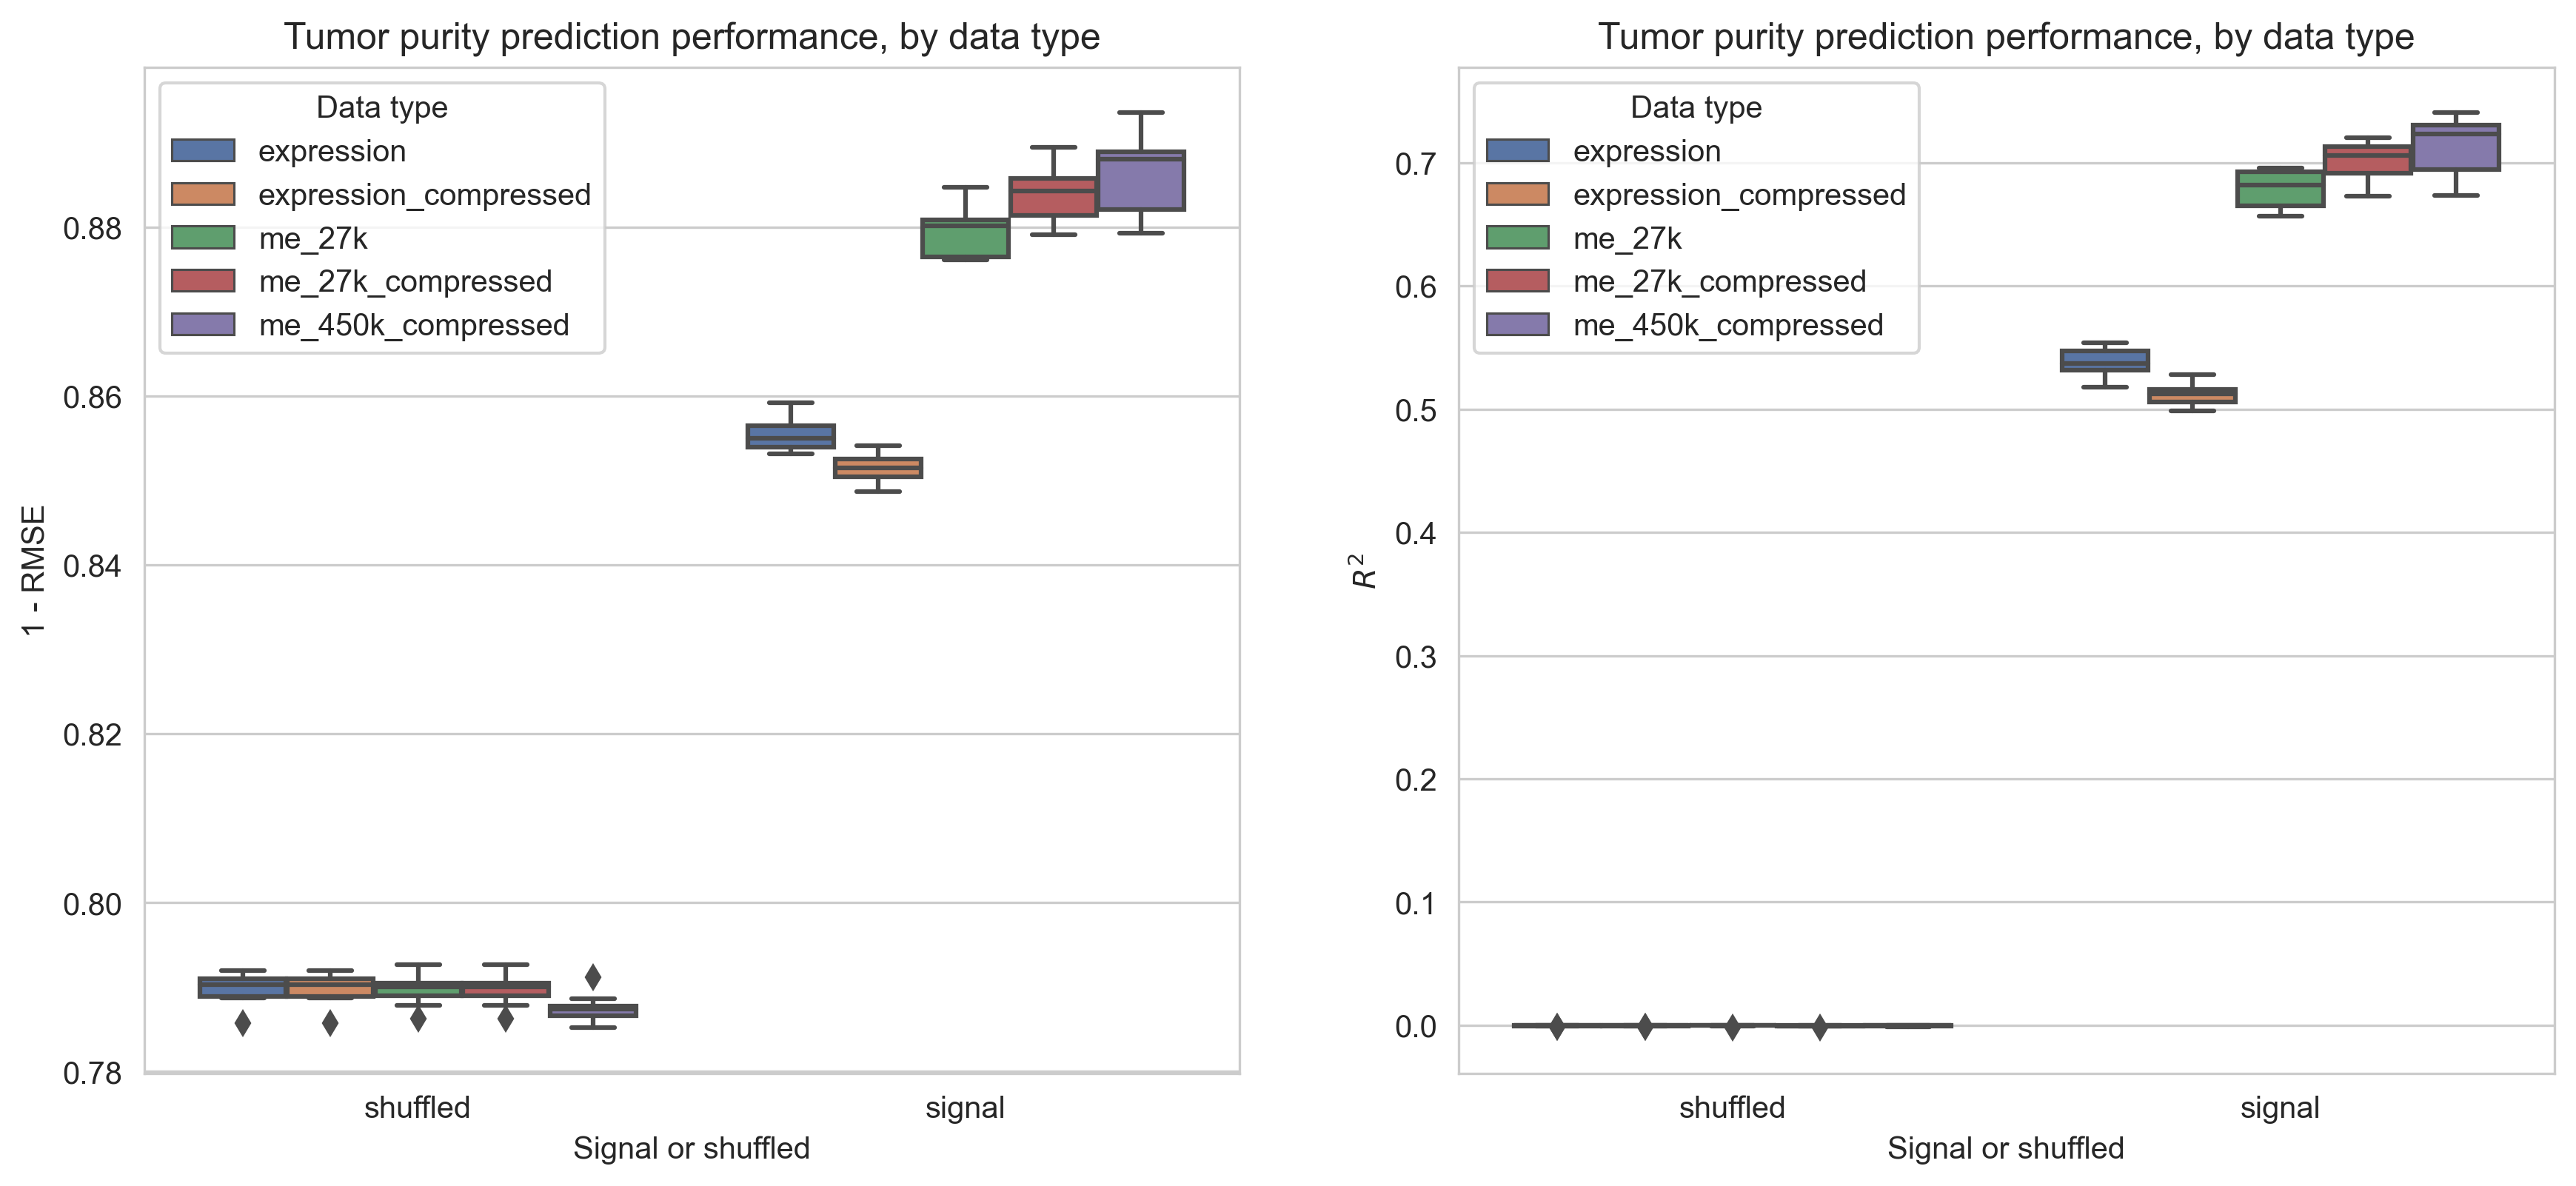

In [4]:
sns.set({'figure.figsize': (14, 6)})
sns.set_style('whitegrid')
fig, axarr = plt.subplots(1, 2)

plot_df = (
    results_df[results_df.data_type == 'test']
      .sort_values(by=['signal', 'training_data'])
)
plot_df['inv_rmse'] = 1 - plot_df.rmse

sns.boxplot(data=plot_df, x='signal', y='inv_rmse', hue='training_data', ax=axarr[0])
axarr[0].set_title('Tumor purity prediction performance, by data type')
axarr[0].set_xlabel('Signal or shuffled')
axarr[0].set_ylabel('1 - RMSE')
axarr[0].legend(title='Data type')
sns.boxplot(data=plot_df, x='signal', y='r2', hue='training_data', ax=axarr[1])
axarr[1].set_title('Tumor purity prediction performance, by data type')
axarr[1].set_xlabel('Signal or shuffled')
axarr[1].set_ylabel(r'$R^2$')
axarr[1].legend(title='Data type')

In [5]:
# now facet by cancer type
import mpmp.utilities.data_utilities as du
sample_info_df = du.load_sample_info('expression')
results_df = au.load_purity_by_cancer_type(results_dir, sample_info_df,
                                           classify=False)
# all me_450k results are compressed
results_df[results_df.training_data == 'me_450k'] = 'me_450k_compressed'
print(results_df.shape)
print(results_df.training_data.unique())
results_df.head()

(2640, 7)
['expression_compressed' 'me_450k_compressed' 'expression' 'me_27k'
 'me_27k_compressed']


,training_data,signal,seed,fold_no,cancer_type,rmse,r2
0,expression_compressed,shuffled,1,0,LUAD,0.227872,-0.0177773
1,expression_compressed,shuffled,1,0,GBM,0.193089,-0.0587962
2,expression_compressed,shuffled,1,0,LUSC,0.207797,-0.00185314
3,expression_compressed,shuffled,1,0,OV,0.0736693,-0.107584
4,expression_compressed,shuffled,1,0,PRAD,0.200749,-0.00212907


In [6]:
top_cancer_types = (sample_info_df
    .groupby('cancer_type')
    .count()
    .drop(columns=['id_for_stratification'])
    .rename(columns={'sample_type': 'count'})
    .sort_values(by='count', ascending=False)
)
top_cancer_types.head()

,count
cancer_type,
BRCA,1218
KIRC,606
LUAD,576
THCA,572
UCEC,567


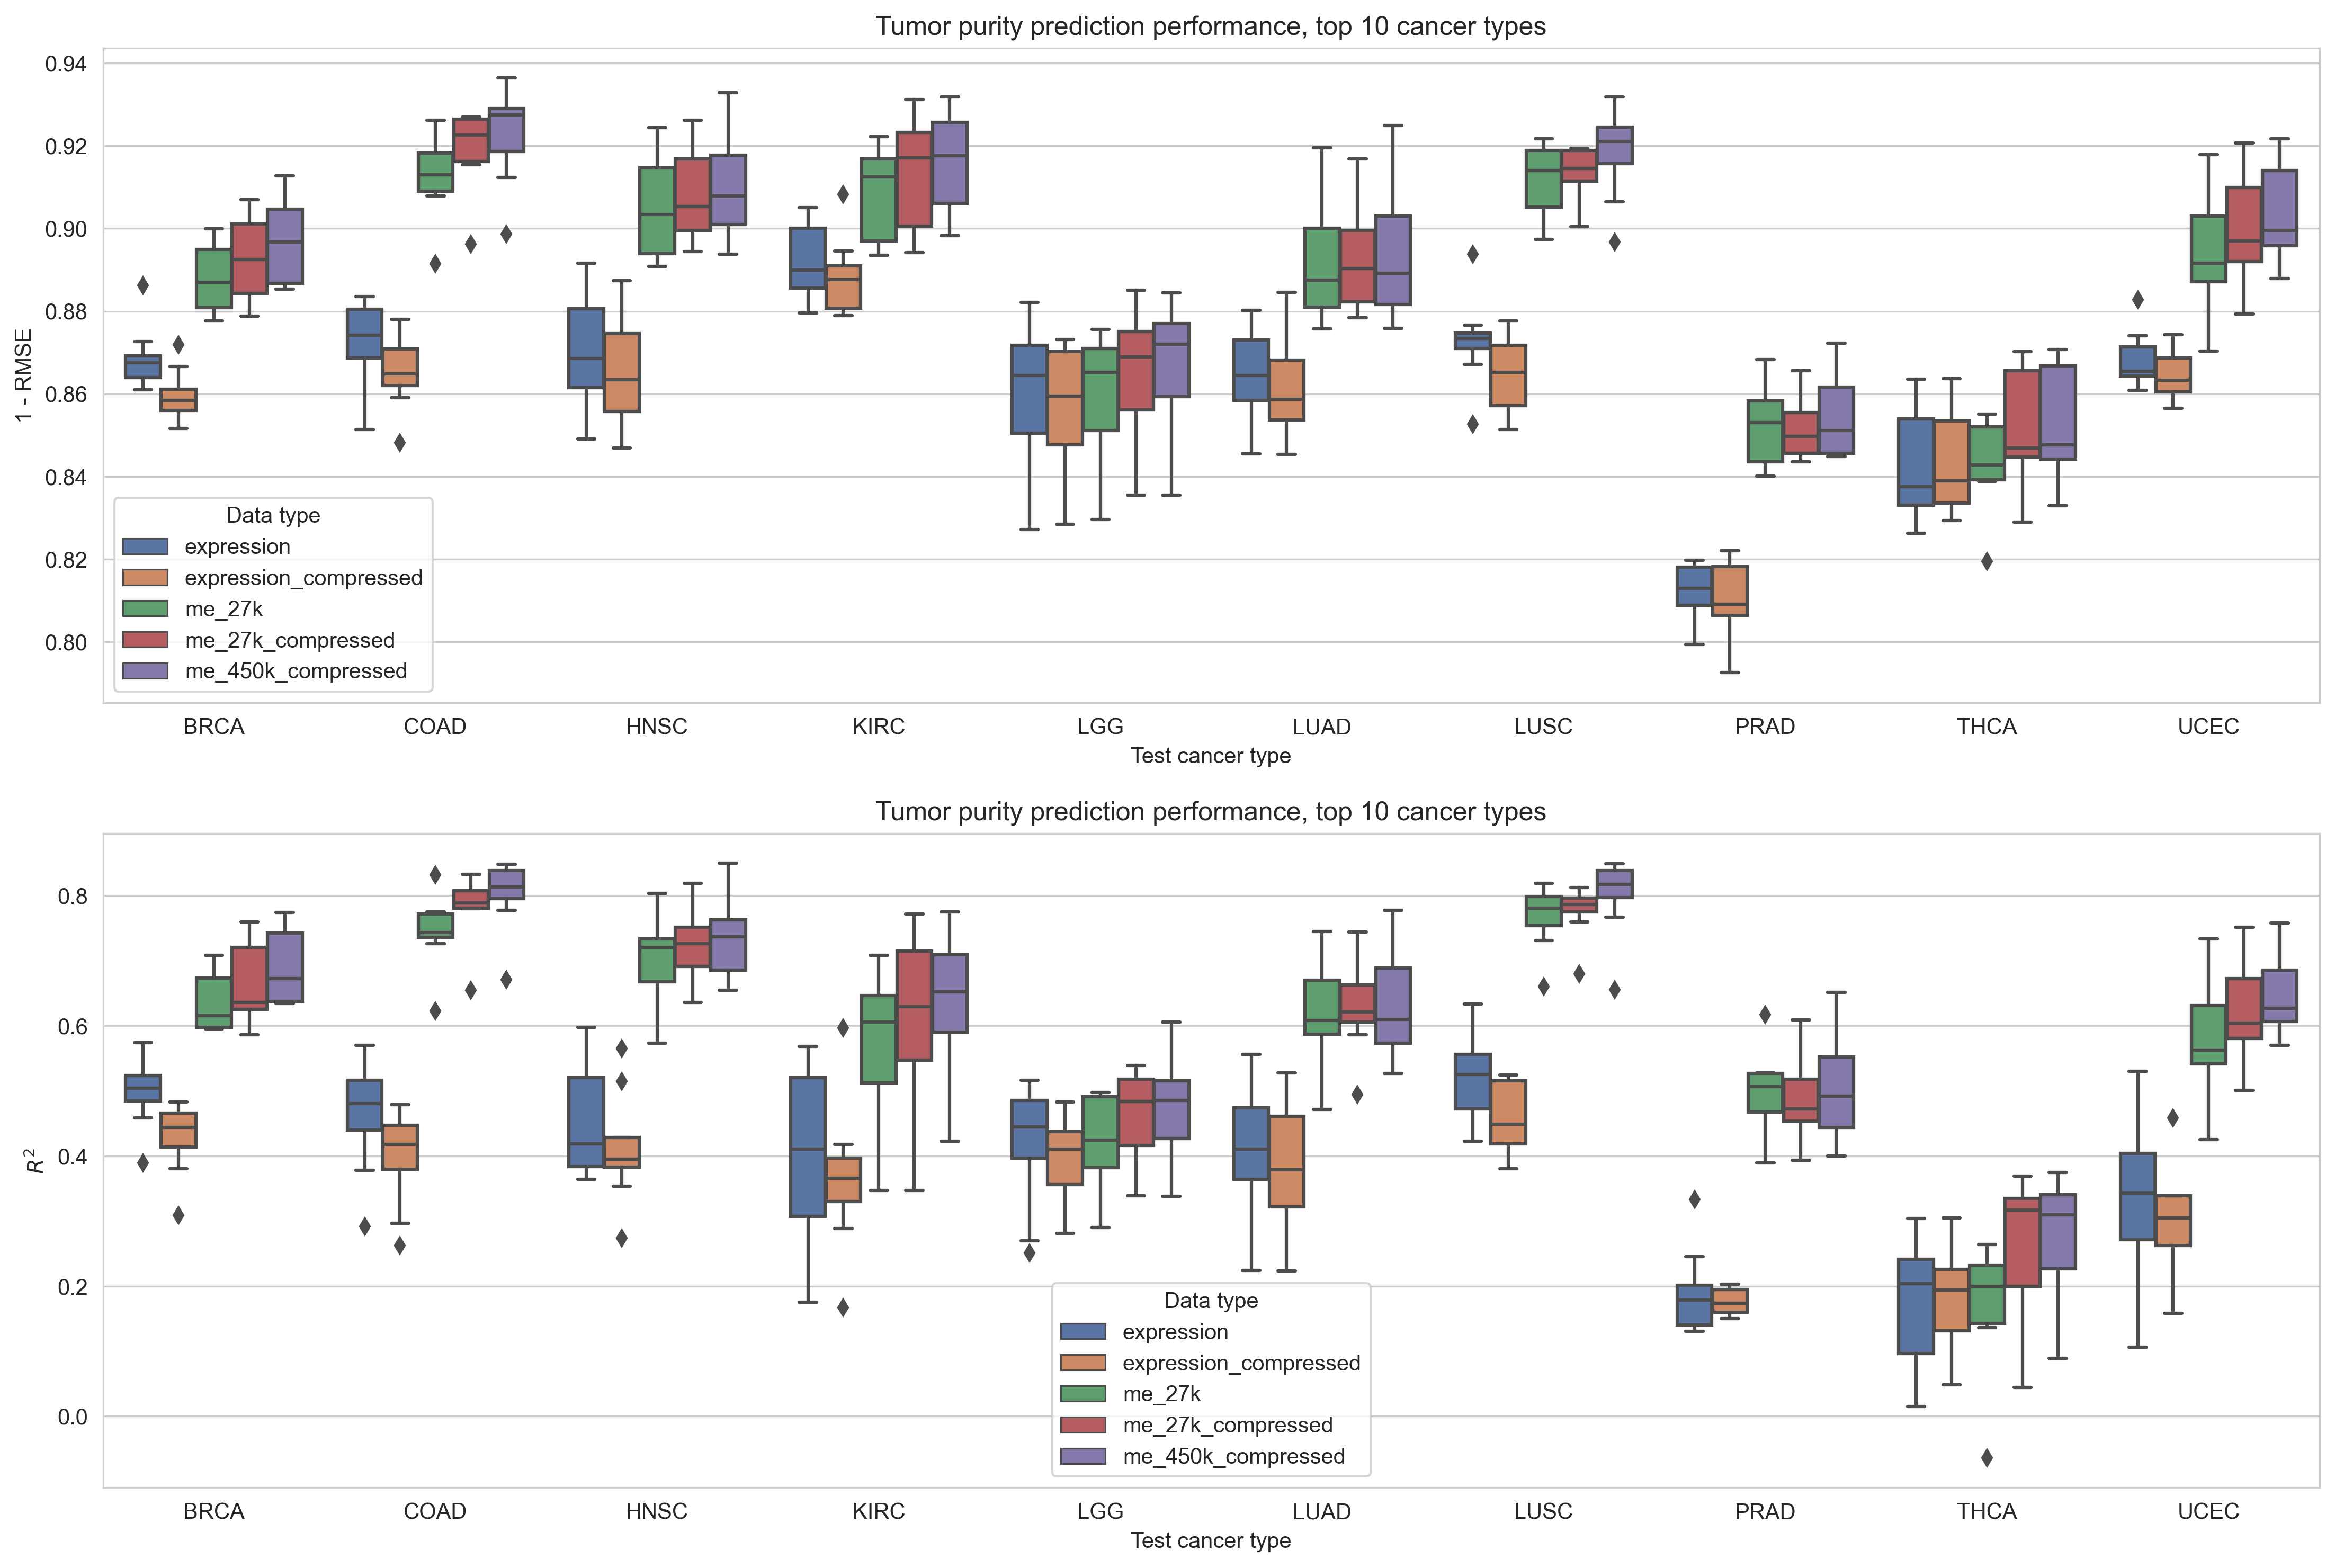

In [7]:
sns.set({'figure.figsize': (18, 12)})
sns.set_style('whitegrid')
fig, axarr = plt.subplots(2, 1)

plot_df = (
    results_df[(results_df.signal == 'signal') &
               (results_df.cancer_type.isin(top_cancer_types.index[:10]))]
      .sort_values(by=['training_data', 'cancer_type'])
)
plot_df['inv_rmse'] = 1 - plot_df.rmse

sns.boxplot(data=plot_df, x='cancer_type', y='inv_rmse', hue='training_data', ax=axarr[0])
axarr[0].set_title('Tumor purity prediction performance, top 10 cancer types')
axarr[0].set_xlabel('Test cancer type')
axarr[0].set_ylabel('1 - RMSE')
axarr[0].legend(title='Data type')
sns.boxplot(data=plot_df, x='cancer_type', y='r2', hue='training_data', ax=axarr[1])
axarr[1].set_title('Tumor purity prediction performance, top 10 cancer types')
axarr[1].set_xlabel('Test cancer type')
axarr[1].set_ylabel(r'$R^2$')
axarr[1].legend(title='Data type')

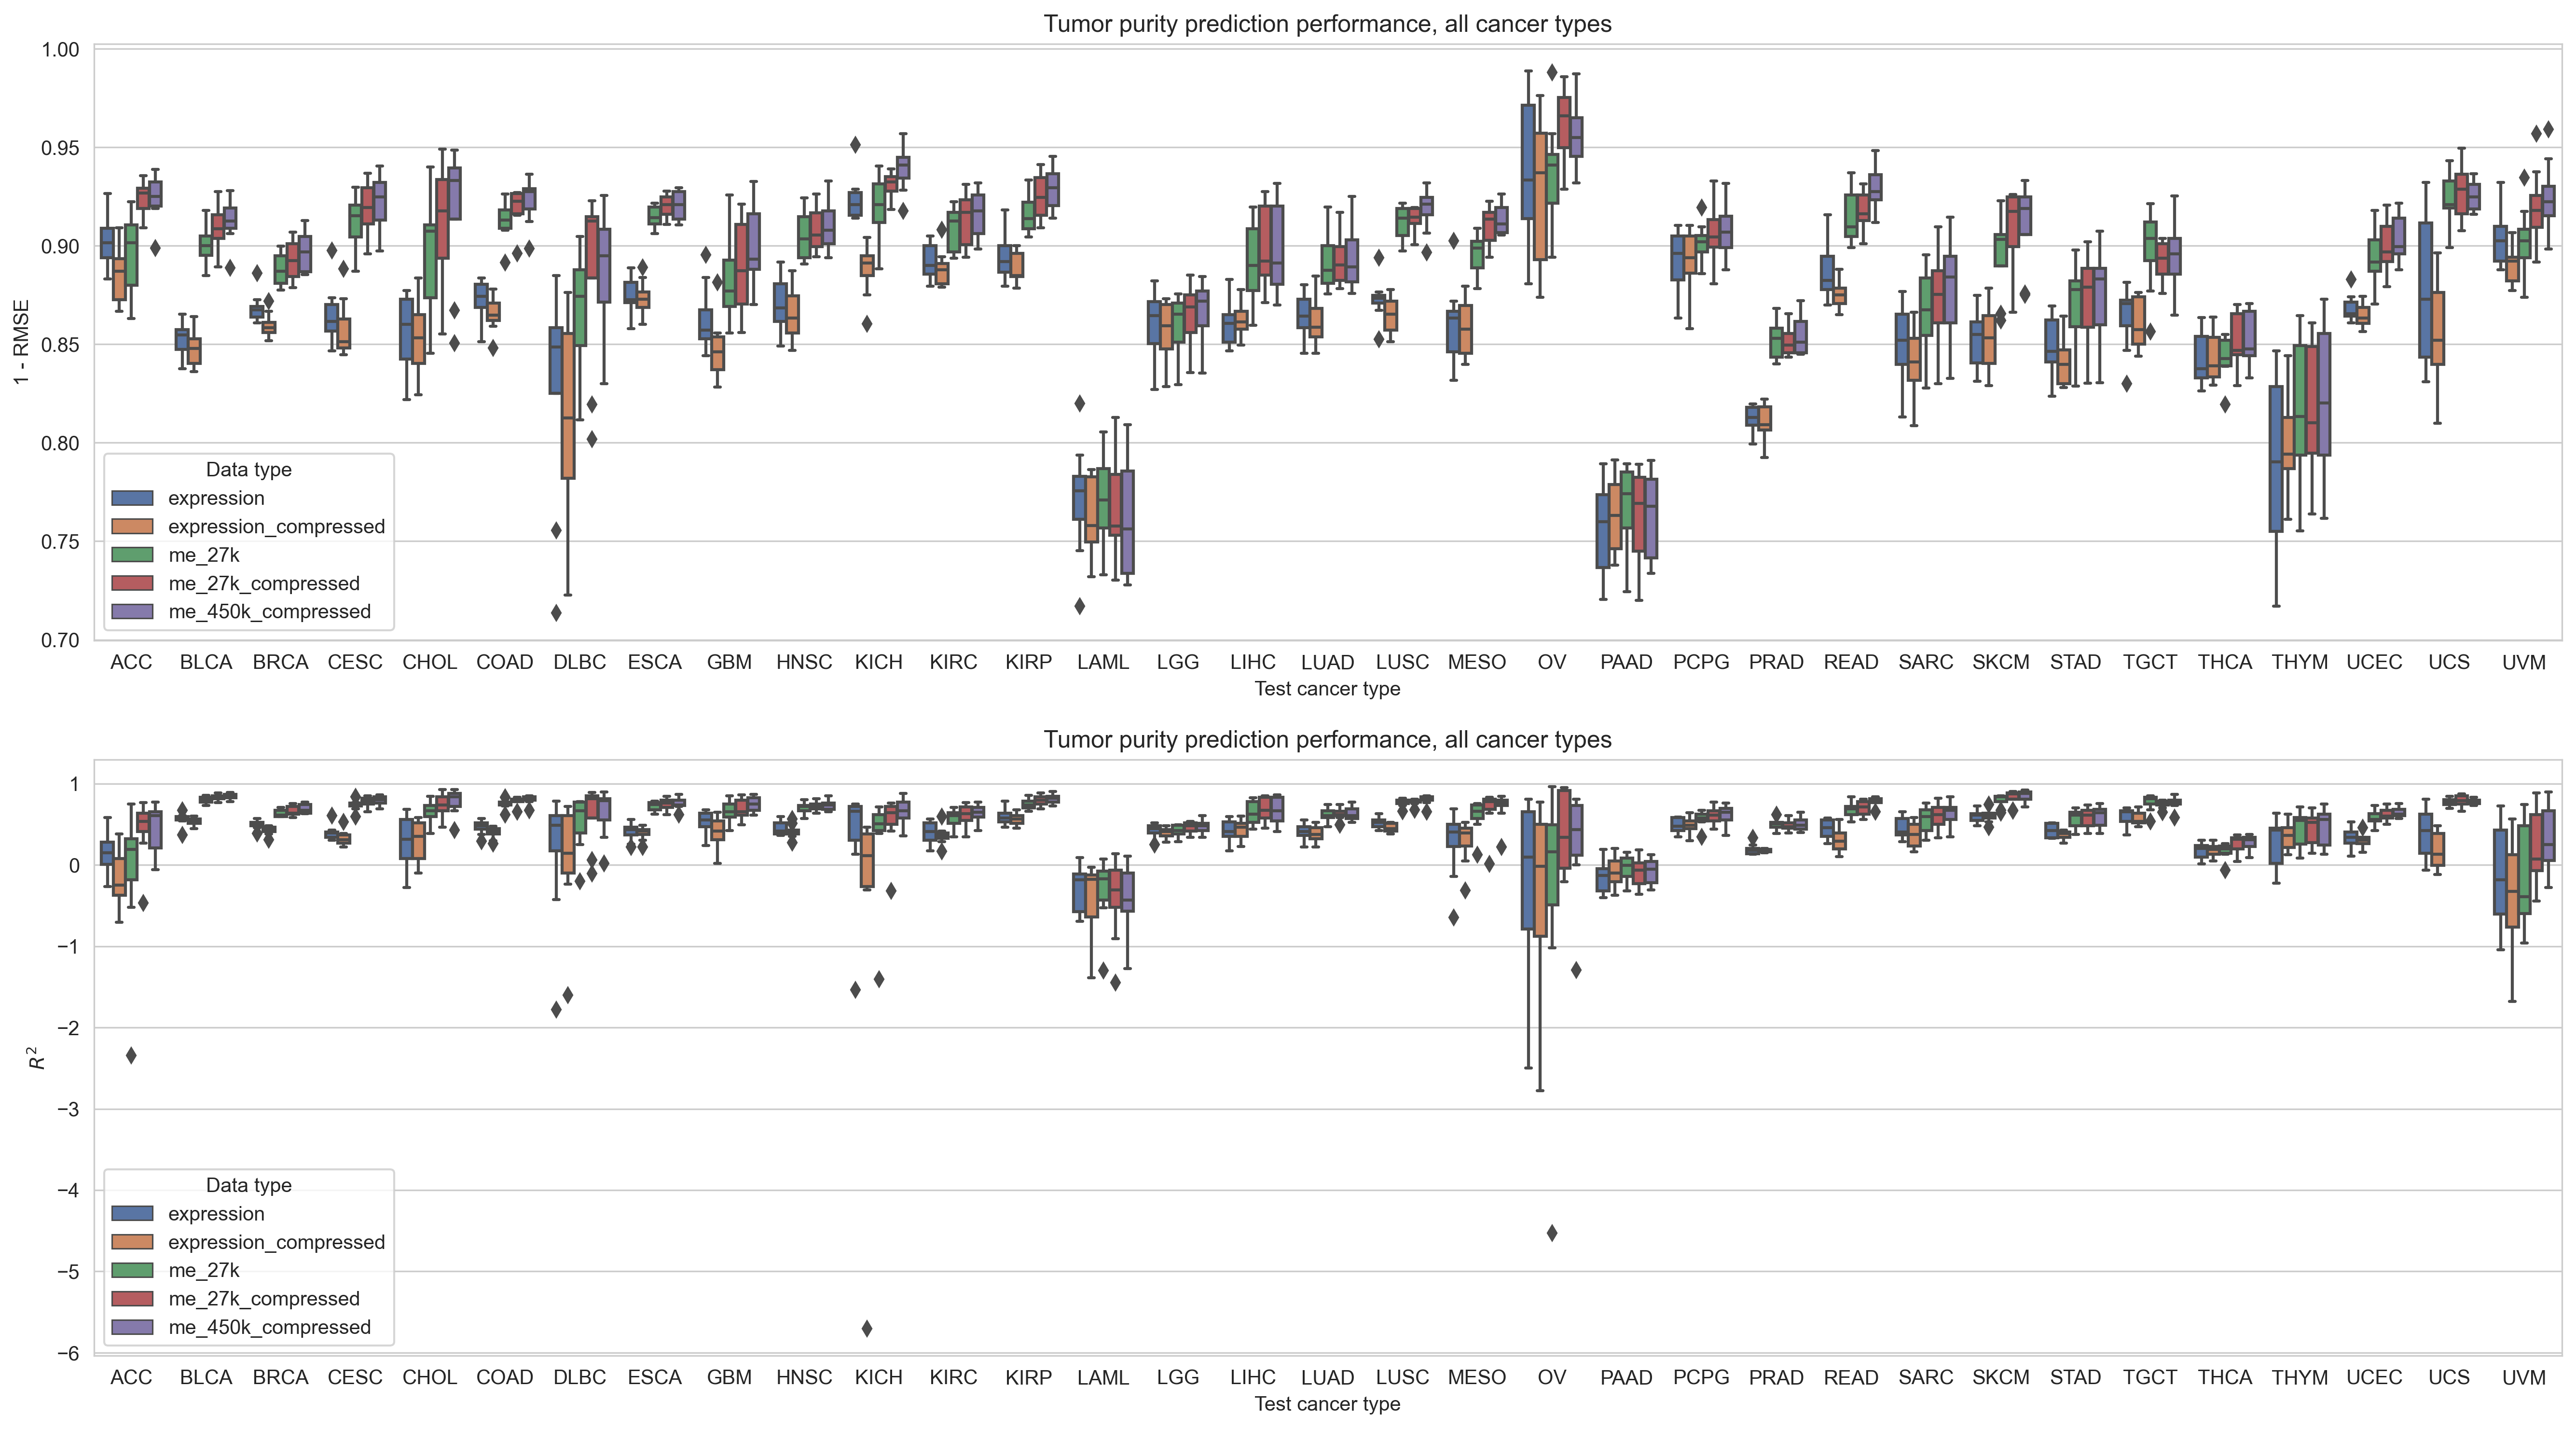

In [8]:
sns.set({'figure.figsize': (22, 12)})
sns.set_style('whitegrid')
fig, axarr = plt.subplots(2, 1)

plot_df = (
    results_df[(results_df.signal == 'signal')]
      .sort_values(by=['training_data', 'cancer_type'])
)
plot_df['inv_rmse'] = 1 - plot_df.rmse

sns.boxplot(data=plot_df, x='cancer_type', y='inv_rmse', hue='training_data', ax=axarr[0])
axarr[0].set_title('Tumor purity prediction performance, all cancer types')
axarr[0].set_xlabel('Test cancer type')
axarr[0].set_ylabel('1 - RMSE')
axarr[0].legend(title='Data type')
sns.boxplot(data=plot_df, x='cancer_type', y='r2', hue='training_data', ax=axarr[1])
axarr[1].set_title('Tumor purity prediction performance, all cancer types')
axarr[1].set_xlabel('Test cancer type')
axarr[1].set_ylabel(r'$R^2$')
axarr[1].legend(title='Data type')